In [ ]:
import numpy as np
from scipy.io import loadmat, savemat, whosmat

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import polars as pl

sns.set_theme(
    context='notebook',
    style='white',
    palette='colorblind',
    rc={
        "figure.figsize": (8, 6),
        "xtick.labelsize": 16,
        "axes.titlesize": 20,
        "axes.labelsize": 16,
        "ytick.labelsize": 12,
        "figure.dpi": 120,
    }
)

sns.set_palette(
    [
        "#000000",
        "#E69F00",
        "#56B4E9",
        "#009E73",
        "#F0E442",
        "#0072B2",
        "#D55E00",
        "#CC79A7",
    ]
)
from os import listdir

In [ ]:
files = listdir("./FEA_136/")

In [ ]:
columns = {"pval": float, "adj_p_val":float, "group": str, "enriched_size": int, "total_size": int}

In [ ]:
pos_df = pd.DataFrame(columns=columns.keys())
neg_df = pd.DataFrame(columns=columns.keys())

In [ ]:
for file in files:
    data = loadmat(f"./FEA_136/{file}", simplify_cells=True)
    pos_df = pd.concat((pos_df, pd.DataFrame(data["pos_result_cell"][1:], columns=columns.keys())))
    neg_df = pd.concat((neg_df, pd.DataFrame(data["neg_result_cell"][1:], columns=columns.keys())))

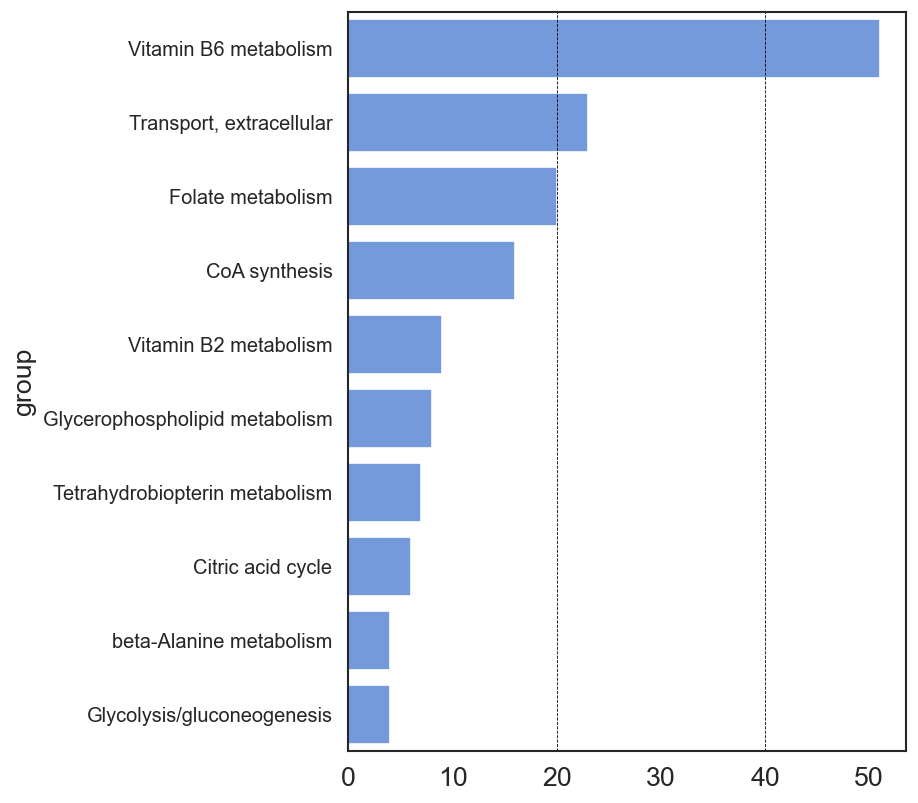

In [ ]:
pos_pathways = pos_df[pos_df["adj_p_val"] < 0.05]["group"].value_counts()

fig = plt.figure(figsize=(6, 8))
sns.barplot(y=pos_pathways.index[:10], x=pos_pathways.values[:10], color="cornflowerblue")

for i in np.arange(0, pos_pathways.max(), 20):
    plt.axvline(x=i, color="black", linestyle="--", lw=0.5)

# plt.title("")

# fig.tight_layout()
fig.savefig("positive_subsystems.png", dpi=300, bbox_inches="tight")

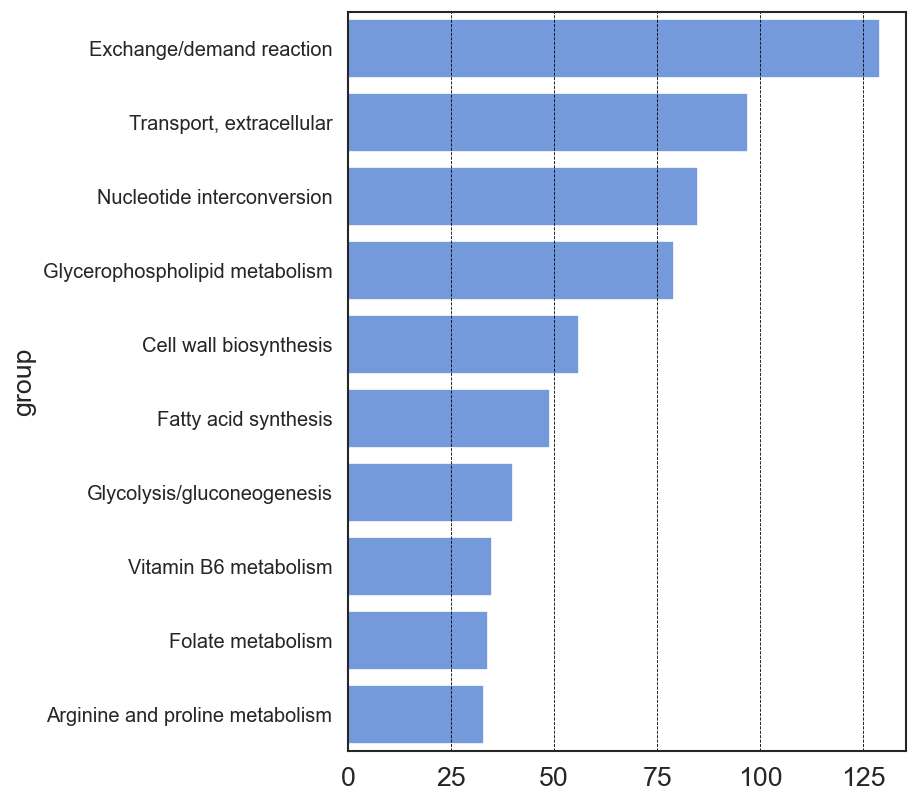

In [ ]:
neg_pathways = neg_df[neg_df["adj_p_val"] < 0.05]["group"].value_counts()

plt.figure(figsize=(6, 8))
sns.barplot(y=neg_pathways.index[:10], x=neg_pathways.values[:10], color="cornflowerblue")

for i in np.arange(0, neg_pathways.max(), 25):
    plt.axvline(x=i, color="black", linestyle="--", lw=0.5)

# plt.title("Negative Subsystems enriched across analysed models")

plt.savefig("negative_subsystems.png", dpi=300, bbox_inches="tight")